In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it
from random import randint

turmas = pd.read_csv('turmas.csv')
# Retira as turmas não atendidas
turmas = turmas[turmas["Situação"] == "Atendida"]
# Reseta os índices do dataFrame
turmas = turmas.reset_index().drop('index',axis=1)
# Formata a coluna Horário para retirar a data. Ex: "24T12 (1/1/2018 - 12/12/2018)" -> "24T12"
turmas['Horário'] = turmas['Horário'].str.split(expand=True)[0]

In [4]:
turmas.head()

,Ano-Período,Componente,Tipo,Situação,Horário,Vagas
0,2018-2,DBQ0050 - BIOINFORMÁTICA ESTRUTURAL,Turma Regular,Atendida,35T12,20
1,2018-2,DIM0114 - BANCO DE DADOS,Turma Regular,Atendida,24M34,10
2,2018-2,DIM0117 - ESTRUTURAS DE DADOS BÁSICAS II,Turma Regular,Atendida,35M34,1
3,2018-2,DIM0119 - ESTRUTURA DE DADOS BÁSICAS I,Turma Regular,Atendida,35M12,1
4,2018-2,DIM0120 - LINGUAGEM DE PROGRAMAÇÃO I,Turma Regular,Atendida,35M56,1


## Função para verificar compatibilidade de horários

In [5]:
''' Compara se dois horários tem mesmo turno '''
def comp_t(hor1, hor2):
    turno = ['M','T','N']
    comp_turno = False
    for t in turno:
        h1 = hor1.find(t)
        h2 = hor2.find(t)
        if (h1 > 0 and h2 > 0):
            return t
    return 'F'

''' Compara se há confilto entre horários '''
def comp(hor1, hor2):
    turno = comp_t(hor1, hor2)
    if (turno == 'F'):
        return False
    
    w1, h1 = hor1.split(turno)
    w2, h2 = hor2.split(turno)
    
    for d1 in w1:
        if (d1 in w2):
            for h in h1:
                if(h in h2):
                    return True
    return False


In [6]:
g = nx.Graph()
#for i in range()
#for h1 in turmas['Horário']:
#    for h2 in turmas['Horário']
n = len(turmas['Horário'])
for i in range(n):
    for j in range(i, n):
        if (comp(turmas['Horário'][i], turmas['Horário'][j])):
            g.add_edge(i, j)


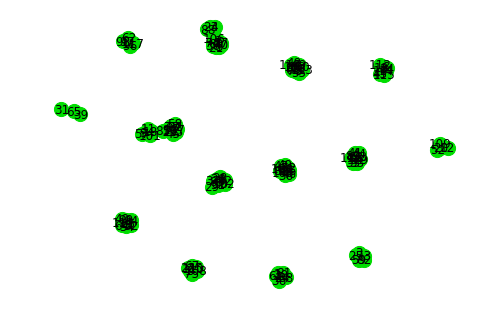

In [7]:
nx.draw(g, with_labels=True, edge_color='skyblue', node_size=200, node_color='#00dd00')
plt.draw()

In [8]:
turmas['cor'] = [-1 for i in range(len(turmas))] # Inicia todos sem cor
turmas['dsat'] = [-1 for i in range(len(turmas))] # Inicia todos sem cor
#turmas.loc[[10],['cor']] = 'yellow'

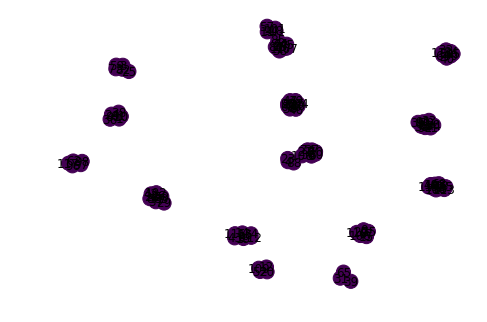

In [9]:
nx.draw(g, with_labels=True, edge_color='skyblue', node_size=200, node_color=turmas['cor'])
plt.draw()

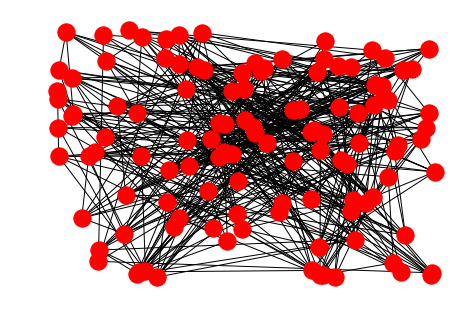

In [10]:
nx.draw_random(g)

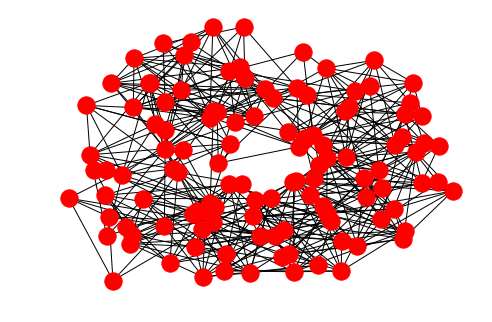

In [11]:
nx.draw_kamada_kawai(g)

In [12]:
result = nx.greedy_color(g, strategy='DSATUR', interchange=False)

# Nosso algoritmo de DSATUR

In [14]:
def update_dsat(g, node):
    counter = set()
    neighbors = list(g.neighbors(node))
    neighbors.remove(neigh) # Por algum motivo o node está conectado a ele mesmo.
    for neigh in neighbors:
        if turmas['cor'][neigh] != -1:
            counter.add(turmas['cor'][neigh])
    turmas['dsat'][node] = len(counter)

def get_greatest_satured_degree_not_colored(g, great):
    # TODO
    pass
def next_color(great, coloration):
    # TODO
    pass

In [16]:
def dsatur(g):
    #Coloration *coloration = new Coloration();
    coloration = []
    count = g.order()
    nbdg = sorted(list(g.degree()), key=lambda x : x[1])
    great = nbdg.pop()
    coloration.append((0, great))
    turmas['cor'][great[0]] = 0
    count-=1
    while count > 0:
        n = list(g.neighbors(great[0]))
        n.remove(great[0]) # Por algum motivo o node está conectado a ele mesmo.
        for neigh in n:
            if turmas['cor'][neigh] == -1:
                update_dsat(g, neigh)

        great = get_greatest_satured_degree_not_colored(g, great)

        color = next_color(great, coloration)

        coloration.append((color, great))
        turmas['cor'][great[0]] = color
        count-=1

    return coloration

In [ ]:
r = dsatur(g)

In [ ]:
co = ['#{0:0{1}x}'.format(randint(0,10000)*r.get(i),6) for i in g.nodes]
for i in range(len(turmas)):
    turmas.loc[i,['cor']] = co[i]

In [ ]:
nx.draw(g, with_labels=True, edge_color='skyblue', node_size=200, node_color=turmas['cor'])
plt.draw()

In [ ]:
l = (list(g.neighbors(0)))
l.remove(0)
for i in l:
    print(i)